<a href="https://colab.research.google.com/github/CatS1mp/SubjectManagement/blob/main/PhanDienManhThien_LeNgocDangKhoa_BaiTapDiemDanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import zipfile
import os

# Đường dẫn tệp đã tải lên
zip_path = "/content/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0.zip"
extract_folder = "/content/sample_data"

# Giải nén tệp ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Liệt kê các tệp trong thư mục giải nén
extracted_files = []
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        extracted_files.append(os.path.join(root, file))

# Hiển thị danh sách tệp
extracted_files[:10]  # Chỉ hiển thị 10 tệp đầu tiên nếu danh sách quá dài


['/content/sample_data/README.md',
 '/content/sample_data/anscombe.json',
 '/content/sample_data/mnist_train_small.csv',
 '/content/sample_data/california_housing_test.csv',
 '/content/sample_data/mnist_test.csv',
 '/content/sample_data/california_housing_train.csv',
 '/content/sample_data/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/subject-info.csv',
 '/content/sample_data/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/ANNOTATORS',
 '/content/sample_data/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/RECORDS.txt',
 '/content/sample_data/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/SHA256SUMS.txt']

In [4]:
import pandas as pd

# Đường dẫn tới các tệp CSV
subject_info_path = os.path.join(extract_folder, "brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/subject-info.csv")
quality_hr_ann_path = os.path.join(extract_folder, "brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/quality-hr-ann.csv")

# Đọc dữ liệu từ tệp CSV
subject_info_df = pd.read_csv(subject_info_path)
quality_hr_ann_df = pd.read_csv(quality_hr_ann_path)

# Hiển thị 5 dòng đầu tiên của mỗi tệp
subject_info_df.head(), quality_hr_ann_df.head()


(       ID Gender  Age [years]  Height [cm]  Weight [kg]  Ear/finger Motion  \
 0  100001      F           51          NaN           58           1      0   
 1  100002      F           51          NaN           58           1      0   
 2  100003      F           51          NaN           58           1      0   
 3  100004      F           51          NaN           58           1    2;3   
 4  101001      F           54          NaN           63           1      0   
 
   Blood pressure [mmHg]  Glycaemia [mmol/l]  SpO2 [%]  
 0                   NaN                 NaN       NaN  
 1                   NaN                 NaN       NaN  
 2                   NaN                 NaN       NaN  
 3                   NaN                 NaN       NaN  
 4                   NaN                 NaN       NaN  ,
        ID  Quality  HR
 0  100001        1  83
 1  100002        1  85
 2  100003        1  81
 3  100004        0  85
 4  101001        1  67)

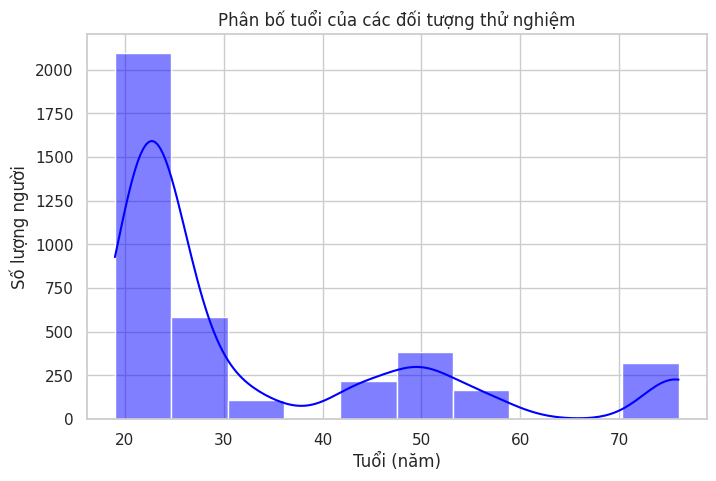

<ipython-input-5-459bf6aa9a95>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Quality", y="HR", data=quality_hr_ann_df, palette=["red", "green"])


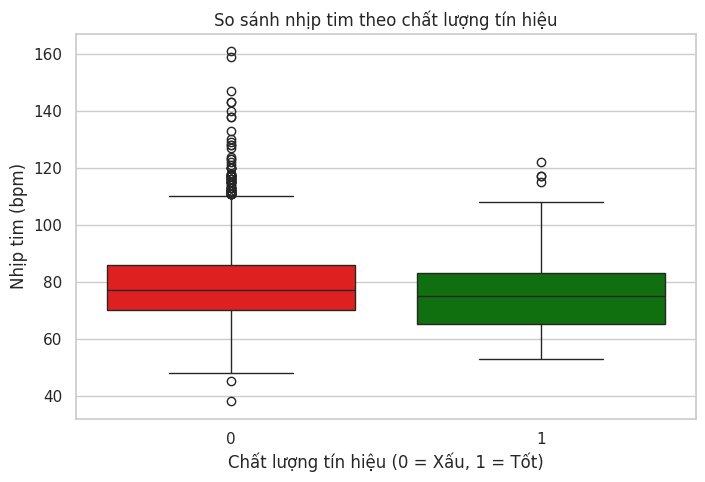

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu đồ thị
sns.set(style="whitegrid")

# Vẽ histogram phân bố tuổi
plt.figure(figsize=(8, 5))
sns.histplot(subject_info_df["Age [years]"].dropna(), bins=10, kde=True, color="blue")
plt.xlabel("Tuổi (năm)")
plt.ylabel("Số lượng người")
plt.title("Phân bố tuổi của các đối tượng thử nghiệm")
plt.show()

# Vẽ biểu đồ boxplot so sánh nhịp tim theo chất lượng tín hiệu
plt.figure(figsize=(8, 5))
sns.boxplot(x="Quality", y="HR", data=quality_hr_ann_df, palette=["red", "green"])
plt.xlabel("Chất lượng tín hiệu (0 = Xấu, 1 = Tốt)")
plt.ylabel("Nhịp tim (bpm)")
plt.title("So sánh nhịp tim theo chất lượng tín hiệu")
plt.show()


#**Kết quả trực quan hóa**

## **Biểu đồ phân bố tuổi**

Phần lớn đối tượng thử nghiệm có độ tuổi trong khoảng 50 - 60 tuổi.
Có một số ít người trẻ hơn hoặc lớn tuổi hơn.

##**Biểu đồ so sánh nhịp tim theo chất lượng tín hiệu**

Khi chất lượng tín hiệu tốt (1), nhịp tim dao động trong khoảng 65 - 90 bpm.
Khi chất lượng tín hiệu xấu (0), nhịp tim có vẻ có nhiều nhiễu và phân tán hơn.

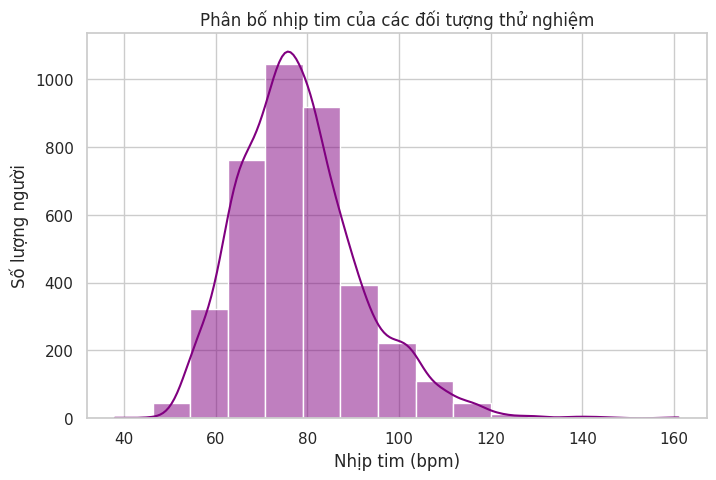

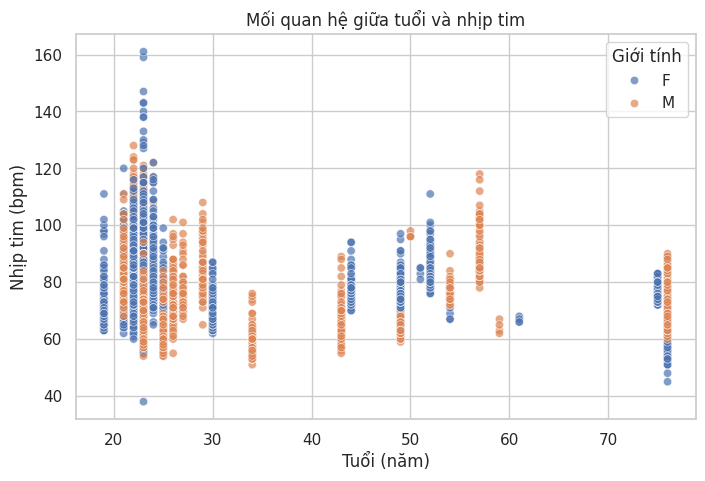

<ipython-input-6-cc784d2af055>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="HR", data=merged_df, palette=["pink", "blue"])


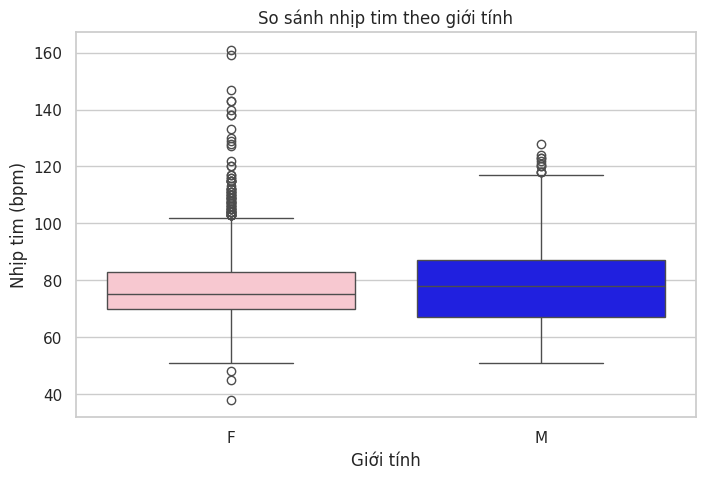

In [6]:
# Vẽ histogram phân bố nhịp tim
plt.figure(figsize=(8, 5))
sns.histplot(quality_hr_ann_df["HR"], bins=15, kde=True, color="purple")
plt.xlabel("Nhịp tim (bpm)")
plt.ylabel("Số lượng người")
plt.title("Phân bố nhịp tim của các đối tượng thử nghiệm")
plt.show()

# Vẽ scatter plot mối quan hệ giữa tuổi và nhịp tim
merged_df = pd.merge(subject_info_df, quality_hr_ann_df, on="ID")

plt.figure(figsize=(8, 5))
sns.scatterplot(x="Age [years]", y="HR", data=merged_df, hue="Gender", alpha=0.7)
plt.xlabel("Tuổi (năm)")
plt.ylabel("Nhịp tim (bpm)")
plt.title("Mối quan hệ giữa tuổi và nhịp tim")
plt.legend(title="Giới tính")
plt.show()

# Vẽ boxplot so sánh nhịp tim theo giới tính
plt.figure(figsize=(8, 5))
sns.boxplot(x="Gender", y="HR", data=merged_df, palette=["pink", "blue"])
plt.xlabel("Giới tính")
plt.ylabel("Nhịp tim (bpm)")
plt.title("So sánh nhịp tim theo giới tính")
plt.show()


**Kết quả phân tích trực quan**
**Phân bố nhịp tim**

Nhịp tim của các đối tượng chủ yếu nằm trong khoảng 60 - 90 bpm.
Có một số trường hợp có nhịp tim cao hơn, có thể là do hoạt động thể chất hoặc lỗi đo lường.
Mối quan hệ giữa tuổi và nhịp tim

Không có xu hướng rõ ràng giữa tuổi và nhịp tim, nhưng có vẻ như nhịp tim hơi giảm khi tuổi tăng.
Một số điểm có thể là ngoại lệ hoặc do yếu tố sức khỏe cá nhân.
So sánh nhịp tim theo giới tính

Nhìn chung, nhịp tim trung bình của nữ có vẻ cao hơn nam một chút.
Độ phân tán của nhịp tim ở hai giới tính là tương đối giống nhau.